In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


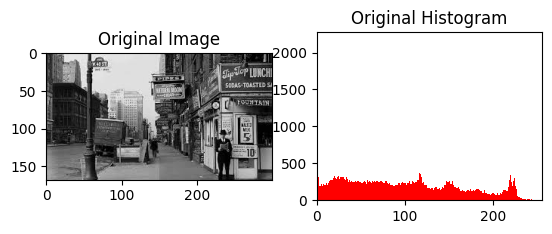

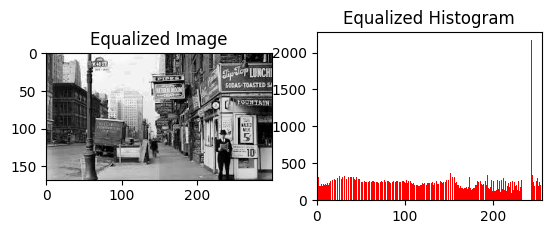

In [ ]:
def histogram_equalization(image):
  if len(image.shape)==3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  hist,bins=np.histogram(image.flatten(),256,[0,256])
  cdf=hist.cumsum()
  cdf_normalized=cdf*hist.max()/cdf.max()
  cdf_m=np.ma.masked_equal(cdf,0)
  cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min()
  cdf=np.ma.filled(cdf_m,0).astype('uint8')
  equalizied_image=cdf[image]
  return equalizied_image,hist,cdf_normalized

def plot_histogram(image,title):
  plt.hist(image.flatten(),256,[0,256],color='r')
  plt.xlim([0,256])
  plt.title(title)
  plt.show()
image_path='/content/x1.jpg'

equalized_image,hist,cdf_normalized=histogram_equalization(image)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plot_histogram(image,'Original Histogram')
plt.subplot(2,2,3)
plt.imshow(equalized_image,cmap='gray')
plt.title('Equalized Image')
plt.subplot(2,2,4)
plot_histogram(equalized_image,'Equalized Histogram')
plt.show()


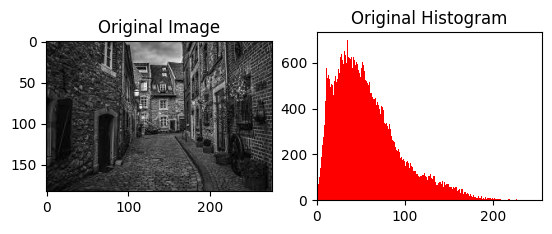

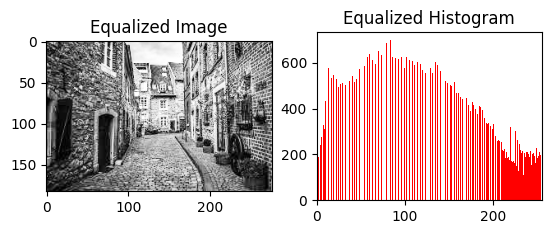

In [ ]:
def histogram_equalization(image):
  if len(image.shape)==3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist,bins=np.histogram(image.flatten(),256,[0,256])
  cdf=hist.cumsum()
  cdf_normalized=cdf*hist.max()/cdf.max()
  cdf_m=np.ma.masked_equal(cdf,0)
  cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
  cdf=np.ma.filled(cdf_m,0).astype('uint8')
  equalizied_image=cdf[image]
  return equalizied_image,hist,cdf_normalized
def plot_histogram(image,title):
  plt.hist(image.flatten(),256,[0,256],color='r')
  plt.xlim([0,256])
  plt.title(title)
  plt.show()
image_path='/content/images.jpg'
image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
equalized_image,hist,cdf_normalized=histogram_equalization(image)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plot_histogram(image,'Original Histogram')
plt.subplot(2,2,3)
plt.imshow(equalized_image,cmap='gray')
plt.title('Equalized Image')
plt.subplot(2,2,4)
plot_histogram(equalized_image,'Equalized Histogram')
plt.show()

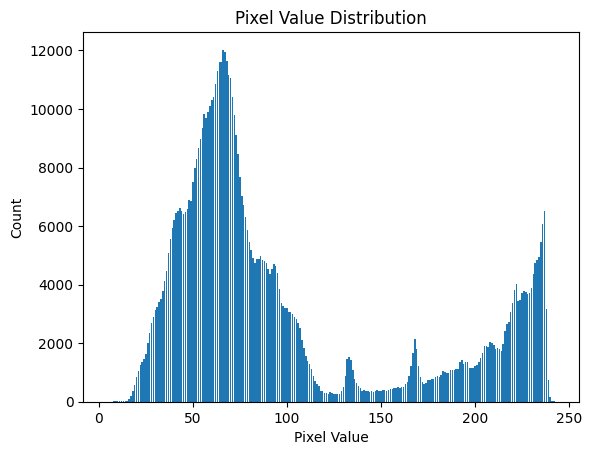

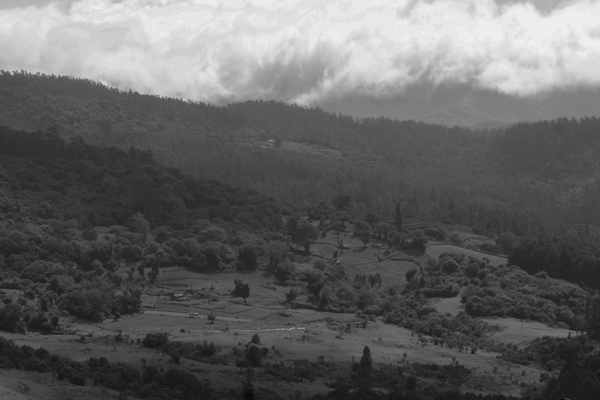

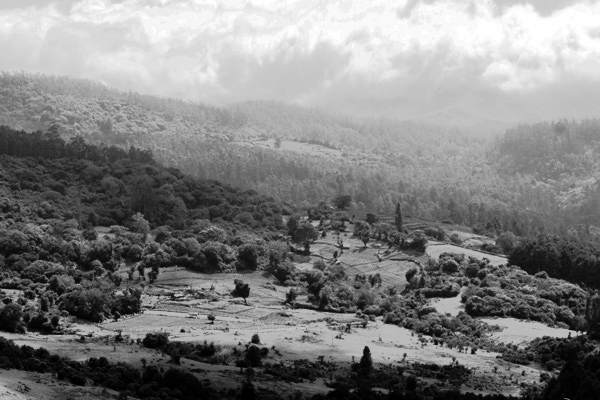

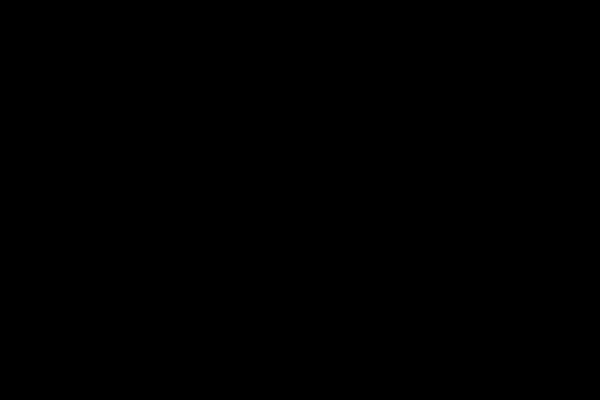

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/land.jpg'  # Replace with your image path
image = cv2.imread(image_path)

flattened_image = image.flatten()

# Count pixel occurrences using a dictionary
pixel_counts = {}
for pixel in flattened_image:
    if pixel in pixel_counts:
        pixel_counts[pixel] += 1
    else:
        pixel_counts[pixel] = 1

# Print the pixel counts
# for pixel, count in pixel_counts.items():
#     print("Pixel value:", pixel, "Count:", count)
pixel_values = list(pixel_counts.keys())
counts = list(pixel_counts.values())

plt.bar(pixel_values, counts)
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.title("Pixel Value Distribution")
plt.show()

if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
cv2_imshow(image)
cv2_imshow(equalized_image)
threshold_value = 255  # Adjust this value as needed

# Convert to black and white using thresholding
_, black_and_white_image = cv2.threshold(equalized_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the black and white image
from google.colab.patches import cv2_imshow
cv2_imshow(black_and_white_image)
cv2.waitKey(0)
cv2.destroyAllWindows()